In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import keras
import numpy as np
import pandas as pd

In [3]:
#import the data ---> these lines are just testing.
test = pd.read_csv("data_four_labels/coffee/_wijo648v0g3208.csv")
print(test)

test2=pd.read_csv("data_four_labels/coffee/2sGQuduhAf41354.csv")
print(test2)

final_df=pd.concat([test,test2])
print(final_df)

FileNotFoundError: [Errno 2] No such file or directory: 'data_four_labels/coffee/_wijo648v0g3208.csv'

In [59]:
import glob

train_df = pd.DataFrame()
test_df = pd.DataFrame()
names = ["coffee", "dog", "door", "milk"]
i = 0
for label in names:
    files = glob.glob(f"/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_four_labels/{label}/*.csv")
    for f in files:
        csv = pd.read_csv(f)
        if i%4 != 0:    
            train_df = pd.concat([train_df, csv])
        else:
            test_df = pd.concat([test_df, csv])
        i += 1
        

print(train_df.shape, test_df.shape)

(10031, 301) (3412, 301)


#### separating the features from the labels (just some testing, not actually used)

In [60]:
def seperate_label(df):
    df_features = df.copy()

    df_labels = df_features.pop("class")

    df_features = np.array(df_features)
    # df_labels = np.array(df_labels)
    print(df_features.shape)
    print(df_labels.shape, type(df_labels))
    return df_features, df_labels

In [61]:
X_train, Y_train = seperate_label(train_df)

(10031, 300)
(10031,) <class 'pandas.core.series.Series'>


In [62]:
X_val, Y_val = seperate_label(test_df)

(3412, 300)
(3412,) <class 'pandas.core.series.Series'>


I"ll also remap every string to an int
per example, 
through a dictionary

In [63]:
def reformat_label(df_labels):    
#should be between 0 and 3
    dicti={"coffee": 0, "dog": 1, "door": 2, "milk": 3}
    # for element in df_labels:
    #     element = dicti[element]

    def change_label(x):
        return dicti[x]

    df_labels = df_labels.apply(change_label)
    df_labels.head()
    return df_labels

Y_train = reformat_label(Y_train)
Y_val = reformat_label(Y_val)

In [64]:
Y_train, Y_val

(0     0
 1     0
 2     0
 3     0
 4     0
      ..
 48    3
 49    3
 50    3
 51    3
 52    3
 Name: class, Length: 10031, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 128    3
 129    3
 130    3
 131    3
 132    3
 Name: class, Length: 3412, dtype: int64)

In [65]:
#I have to make each label a single vector 
# I can just rotate (transpose, since now I have a single rolumn, I will make it into many rows)! 
Y_train = np.array([Y_train]).T
Y_val = np.array([Y_val]).T
print(Y_train.shape, Y_val.shape)

(10031, 1) (3412, 1)


#### train_test_split

##### I'll split into train and val, and then tensorflow will split for me in train and test

In [66]:
from sklearn.utils import shuffle

X_train,Y_train = shuffle(X_train, Y_train, random_state=0)
X_val,Y_val = shuffle(X_val, Y_val, random_state=0)
X_train, Y_train


(array([[ 5.63830495e-01,  2.86540329e-01, -8.65268826e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.17494559e-01,  2.53635138e-01, -4.42303270e-01, ...,
          9.72917676e-01, -5.39068365e-04,  0.00000000e+00],
        [ 5.29863298e-01,  3.00972611e-01, -8.65043879e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 5.09530008e-01,  2.99779564e-01, -4.62034523e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.97326165e-01,  4.07658160e-01, -1.51520216e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.30222893e-01,  3.16651374e-01, -1.52776659e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[1],
        [1],
        [1],
        ...,
        [1],
        [3],
        [1]]))

## creating the model

In [88]:
model = Sequential([
    #if it overfits, I can use dropout layers (it only gets some of the inputs from the previous, so you wanna )
    Dense(units=256, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=64, activation='relu',
          kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    Dense(units=4, activation='softmax')
])

In [89]:
#cost function
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

In [90]:
#fitting
history = model.fit(X_train,Y_train, epochs=20, validation_data=(X_val,Y_val))

Epoch 1/20
  1/314 [..............................] - ETA: 2:14 - loss: 114.2495 - accuracy: 0.1875

2023-03-25 22:32:28.274482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - ETA: 0s - loss: 18.2630 - accuracy: 0.4608

2023-03-25 22:32:30.283915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - 3s 7ms/step - loss: 18.2630 - accuracy: 0.4608 - val_loss: 1.4139 - val_accuracy: 0.4962
Epoch 2/20
314/314 [==============================] - 2s 7ms/step - loss: 1.4032 - accuracy: 0.4475 - val_loss: 1.3470 - val_accuracy: 0.4933
Epoch 3/20
314/314 [==============================] - 2s 6ms/step - loss: 1.3483 - accuracy: 0.4975 - val_loss: 1.2991 - val_accuracy: 0.4455
Epoch 4/20
314/314 [==============================] - 2s 6ms/step - loss: 1.2869 - accuracy: 0.5318 - val_loss: 1.2429 - val_accuracy: 0.4505
Epoch 5/20
314/314 [==============================] - 2s 6ms/step - loss: 1.2433 - accuracy: 0.5631 - val_loss: 1.2100 - val_accuracy: 0.6152
Epoch 6/20
314/314 [==============================] - 2s 6ms/step - loss: 1.2093 - accuracy: 0.6055 - val_loss: 1.1924 - val_accuracy: 0.6187
Epoch 7/20
314/314 [==============================] - 2s 6ms/step - loss: 1.1805 - accuracy: 0.6182 - val_loss: 1.1824 - val_accuracy: 0.5926
Epoch 8/20
314/3

In [91]:
model.evaluate(X_val,Y_val)
model.summary()

107/107 [==============================] - 1s 6ms/step - loss: 1.1184 - accuracy: 0.6251
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               77056     
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 4)                 260       
                                                                 
Total params: 93,764
Trainable params: 93,764
Non-trainable params: 0
_________________________________________________________________


## save the model

In [92]:
model.save("saved_model")

INFO:tensorflow:Assets written to: saved_model/assets


In [93]:
test_df = np.array([[0.4981820583343506,0.3041764795780182,-0.39641207456588745,0.9999492764472961,0.5154309272766113,0.2550220787525177,-0.34935909509658813,0.9998473525047302,0.5238351225852966,0.2552952766418457,-0.34945884346961975,0.9998874068260193,0.5324825644493103,0.25629663467407227,-0.3490661680698395,0.9998465776443481,0.480642706155777,0.258960485458374,-0.35233527421951294,0.9998729228973389,0.46913933753967285,0.26167136430740356,-0.3522539734840393,0.9999103546142578,0.4588560163974762,0.26559099555015564,-0.35270392894744873,0.9998877644538879,0.5477309823036194,0.2884930372238159,-0.08250369131565094,0.9998624324798584,0.44203734397888184,0.2937893569469452,-0.08980625122785568,0.9999209046363831,0.5207302570343018,0.3572015166282654,-0.2996494770050049,0.9999455809593201,0.4778904318809509,0.35783419013023376,-0.303683340549469,0.9999536871910095,0.6314497590065002,0.5698841214179993,0.008182904683053493,0.9999152421951294,0.37602466344833374,0.5611208081245422,0.020433634519577026,0.9998253583908081,0.7292965650558472,0.9798671007156372,-0.32061514258384705,0.9971438646316528,0.20657332241535187,0.8604757785797119,-0.35482174158096313,0.9956580996513367,0.5498597621917725,0.8489202857017517,-0.7637590169906616,0.9986798167228699,0.37362605333328247,0.6491265296936035,-0.8803924322128296,0.9952695369720459,0.4984210431575775,0.8526077270507812,-0.8525819778442383,0.9939749836921692,0.4279037117958069,0.6301683187484741,-0.9744688868522644,0.9816589951515198,0.49681568145751953,0.7763991355895996,-0.7786155939102173,0.9938353300094604,0.43934187293052673,0.5735072493553162,-0.9105846285820007,0.9798092246055603,0.5083235502243042,0.7676472067832947,-0.7398286461830139,0.991555392742157,0.4291306436061859,0.581972599029541,-0.8635354042053223,0.9797517657279968,0.5966092348098755,1.2567808628082275,-0.008524066768586636,0.1589588075876236,0.38996055722236633,1.2599668502807617,0.010765359736979008,0.17815829813480377,0.5948789715766907,1.8001701831817627,0.003953699953854084,0.012086698785424232,0.4031899869441986,1.7931101322174072,-0.015372313559055328,0.00784522294998169,0.6021834015846252,2.2724609375,0.30393192172050476,0.0014408509014174342,0.42258867621421814,2.2609975337982178,0.15069334208965302,0.0005837850621901453,0.6074386835098267,2.337127685546875,0.3106561303138733,0.0007881768397055566,0.41845861077308655,2.323322296142578,0.15600086748600006,0.0007185556460171938,0.5843966603279114,2.4317216873168945,-0.0522509329020977,0.0006601922796107829,0.4535377621650696,2.422938585281372,-0.2161559760570526,0.001258615986444056,0.373634397983551,0.6499707102775574,-1.8444630711655918e-07,0.0,0.39679813385009766,0.5777179598808289,0.0013798748841509223,0.0,0.43735894560813904,0.534506618976593,-0.00420121755450964,0.0,0.47639840841293335,0.5254983901977539,-0.01024630106985569,0.0,0.5027356743812561,0.5411986708641052,-0.014173091389238834,0.0,0.45060163736343384,0.5403348207473755,-0.015738490968942642,0.0,0.5017736554145813,0.5638222098350525,-0.02503901533782482,0.0,0.4914117455482483,0.5653451681137085,-0.027088096365332603,0.0,0.47413501143455505,0.564212441444397,-0.0264134518802166,0.0,0.4494023323059082,0.5912742614746094,-0.021495746448636055,0.0,0.5018069744110107,0.6102883815765381,-0.025984806939959526,0.0,0.4879333972930908,0.6084942817687988,-0.0215410478413105,0.0,0.46763357520103455,0.6072394847869873,-0.018301531672477722,0.0,0.44739097356796265,0.6418318152427673,-0.02643604204058647,0.0,0.4959167242050171,0.6526373028755188,-0.02697780914604664,0.0,0.48271769285202026,0.6494451761245728,-0.015943871811032295,0.0,0.46350032091140747,0.6479849815368652,-0.009380415081977844,0.0,0.4440409541130066,0.686765730381012,-0.03130561113357544,0.0,0.48238319158554077,0.6835903525352478,-0.027893563732504845,0.0,0.4705689549446106,0.6809285879135132,-0.01684371940791607,0.0,0.4541867673397064,0.6818298101425171,-0.009424922056496143,0.0,0.5541528463363647,0.8231633305549622,-1.2188849041194771e-07,0.0,0.5286245942115784,0.7567625045776367,0.002618174534291029,0.0,0.490420401096344,0.725986659526825,-0.0019848633091896772,0.0,0.45551788806915283,0.727816104888916,-0.006525832694023848,0.0,0.4336313307285309,0.7500261068344116,-0.011036446318030357,0.0,0.4799780249595642,0.7299957275390625,-0.022469153627753258,0.0,0.4273468255996704,0.7438825368881226,-0.032165635377168655,0.0,0.4391612410545349,0.7527205348014832,-0.0347185879945755,0.0,0.4578348398208618,0.7505552768707275,-0.034520745277404785,0.0,0.4814111292362213,0.783324658870697,-0.027409298345446587,0.0,0.4299897849559784,0.79166579246521,-0.032714203000068665,0.0,0.4421943128108978,0.7919579744338989,-0.02897382713854313,0.0,0.4601382911205292,0.789323091506958,-0.02673531323671341,0.0,0.4840109646320343,0.8338181972503662,-0.03076060861349106,0.0,0.4401523470878601,0.8343431949615479,-0.032595742493867874,0.0,0.45229482650756836,0.8290730118751526,-0.02321871742606163,0.0,0.467772513628006,0.826426088809967,-0.01786368153989315,0.0,0.4874705970287323,0.8772450685501099,-0.03356040641665459,0.0,0.4529787600040436,0.8700811266899109,-0.03298313543200493,0.0,0.4627114236354828,0.8613516688346863,-0.02354632131755352,0.0,0.4751517176628113,0.8603678345680237,-0.016946855932474136,0.0]])
#this is coffee

model.predict(test_df)

1/1 [==============================] - 0s 36ms/step


2023-03-25 22:33:31.149521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.88871413, 0.0100118 , 0.03439517, 0.06687891]], dtype=float32)

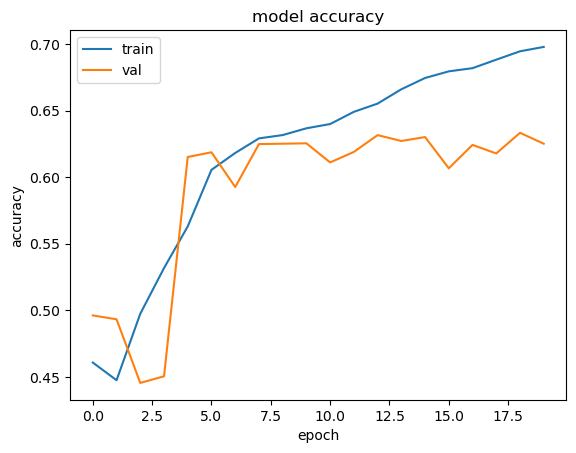

In [94]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy_4_labels_no_regularization.png')
plt.show()

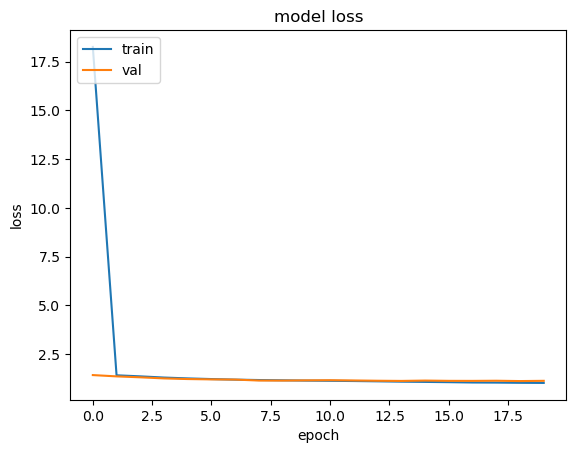

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss_4_labels_no_regularization.png')
plt.show()
